In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt5
# matplotlib.use('Agg')

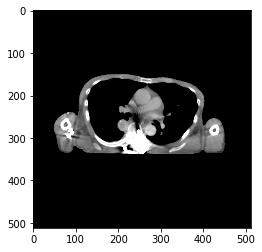

In [3]:
img_path = '/home/czey/generative_inpainting/training_data/CTArmNpy/training_pix2pix_trainAtrainB/trainBnew/Y170109/1005B.npy'
img = np.load(img_path)
plt.imshow(img,vmin=-260+1024,vmax=340+1024,cmap='gray')
plt.show()

In [59]:
patient_names[patient_id]

'Y191210'

In [63]:
import numpy as np
from skimage.metrics import mean_squared_error as mse
# from skimage.measure import compare_mse as mse2
from skimage.metrics import normalized_root_mse as nrm
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
def mae(img1, img2):
    mae = np.mean( abs(img1 - img2)  )
    return mae

def mse2(img1, img2):
    mse = np.mean( (img1 - img2) ** 2  )
    return mse

In [70]:
error = unet256_fakeBs[0,:,:]-imgs_realA[0,:,:]
print(error.min(),error.max())

-3012.3237 1178.4777


In [71]:
# for patient_id in range(1,2):
patient_id = 6
i=39
path_unet = '/media/czey/Elements/0_test_validation_v2/test_unet'
path_pix2pix = '/media/czey/Elements/0_test_validation_v2/test_pix2pix'
path_cyclegan = '/media/czey/Elements/0_test_validation_v2/test_cyclegan'
path_LIMAR = '/home/czey/generative_inpainting/CTarms_201116/npytodoTPS/LIMAR'
path_NMAR = '/home/czey/generative_inpainting/CTarms_201116/npytodoTPS/NMAR'
patient_names = sorted(os.listdir(path_unet))
patient_path = os.path.join(path_unet, patient_names[patient_id])
npy_names = sorted(os.listdir(patient_path))
realA_names = [x for x in npy_names if 'realA.npy' in x]
realB_names = [x for x in npy_names if 'realB.npy' in x]
fakeB_names = [x for x in npy_names if 'fakeB.npy' in x]
# realA_names

imgs_realA=[]
imgs_realB = []
unet256_fakeBs = []
pix2pix_fakeBs = []
cyclegan_fakeBs = []
LIMAR_fakeBs = []
NMAR_fakeBs = []

for realA, realB, fakeB in zip(realA_names, realB_names, fakeB_names): 
#     print(realA)
    img_realA = np.load(os.path.join(path_unet, patient_names[patient_id], realA))
    img_realB = np.load(os.path.join(path_unet, patient_names[patient_id], realB))
    unet256_fakeB = np.load(os.path.join(path_unet, patient_names[patient_id], fakeB))
    pix2pix_fakeB = np.load(os.path.join(path_pix2pix, patient_names[patient_id], fakeB))
    cyclegan_fakeB = np.load(os.path.join(path_cyclegan, patient_names[patient_id], fakeB))
    LIMAR_fakeB = np.load(os.path.join(path_LIMAR, patient_names[patient_id], fakeB[:5]+'.npy'))
    NMAR_fakeB = np.load(os.path.join(path_NMAR, patient_names[patient_id], fakeB[:5]+'.npy'))

    img_realA = (np.squeeze(img_realA,1) + 1) /2 * 4095
    img_realB = (np.squeeze(img_realB,1) + 1) /2 * 4095
    unet256_fakeB = (np.squeeze(unet256_fakeB,1) + 1) /2 * 4095
    pix2pix_fakeB = (np.squeeze(pix2pix_fakeB,1) + 1) /2 * 4095
    cyclegan_fakeB = (np.squeeze(cyclegan_fakeB,1) + 1) /2 * 4095
    LIMAR_fakeB = np.expand_dims(LIMAR_fakeB, 0)
    NMAR_fakeB = np.expand_dims(NMAR_fakeB, 0)

    imgs_realA.append(img_realA)
    imgs_realB.append(img_realB)
    unet256_fakeBs.append(unet256_fakeB)  
    pix2pix_fakeBs.append(pix2pix_fakeB)
    cyclegan_fakeBs.append(cyclegan_fakeB)
    LIMAR_fakeBs.append(LIMAR_fakeB)
    NMAR_fakeBs.append(NMAR_fakeB)

imgs_realA = np.vstack(imgs_realA)
imgs_realB = np.vstack(imgs_realB)
unet256_fakeBs = np.vstack(unet256_fakeBs)
pix2pix_fakeBs = np.vstack(pix2pix_fakeBs)
cyclegan_fakeBs = np.vstack(cyclegan_fakeBs)
LIMAR_fakeBs = np.vstack(LIMAR_fakeBs)
NMAR_fakeBs = np.vstack(NMAR_fakeBs)
print("patient_id: ", patient_id)

print('mae of realA: ',mae(imgs_realA, imgs_realB))
print('mae of unet: ',mae(unet256_fakeBs, imgs_realB))
print('mae of pix2pix: ',mae(pix2pix_fakeBs, imgs_realB))
print('mae of cyclegan: ',mae(cyclegan_fakeBs, imgs_realB))
print('mae of LIMAR: ',mae(LIMAR_fakeBs, imgs_realB))
print('mae of NMAR: ',mae(NMAR_fakeBs, imgs_realB))

print('mse of realA: ',mse(imgs_realA, imgs_realB))
print('mse of unet: ',mse(unet256_fakeBs, imgs_realB))
print('mse of pix2pix: ',mse(pix2pix_fakeBs, imgs_realB))
print('mse of cyclegan: ',mse(cyclegan_fakeBs, imgs_realB))
print('mse of LIMAR: ',mse(LIMAR_fakeBs, imgs_realB))
print('mse of NMAR: ',mse(NMAR_fakeBs, imgs_realB))

print('mse of realA: ',mse2(imgs_realA, imgs_realB))
print('mse of unet: ',mse2(unet256_fakeBs, imgs_realB))
print('mse of pix2pix: ',mse2(pix2pix_fakeBs, imgs_realB))
print('mse of cyclegan: ',mse2(cyclegan_fakeBs, imgs_realB))
print('mse of LIMAR: ',mse2(LIMAR_fakeBs, imgs_realB))
print('mse of NMAR: ',mse2(NMAR_fakeBs, imgs_realB))

# print('psnr of realA: ',psnr(imgs_realA.astype('uint16'), imgs_realB.astype('uint16')))
# print('psnr of unet: ',psnr(unet256_fakeBs.astype('uint16'), imgs_realB.astype('uint16')))
# print('psnr of pix2pix: ',psnr(pix2pix_fakeBs.astype('uint16'), imgs_realB.astype('uint16')))
# print('psnr of cyclegan: ',psnr(cyclegan_fakeBs.astype('uint16'), imgs_realB.astype('uint16')))
# print('psnr of LIMAR: ',psnr(LIMAR_fakeBs.astype('uint16'), imgs_realB.astype('uint16')))
# print('psnr of NMAR: ',psnr(NMAR_fakeBs.astype('uint16'), imgs_realB.astype('uint16')))
# print('ssim of realA: ',ssim(imgs_realA/4095, imgs_realB/4095))
# print('ssim of unet: ',ssim(unet256_fakeBs/4095, imgs_realB/4095))
# print('ssim of pix2pix: ',ssim(pix2pix_fakeBs/4095, imgs_realB/4095))
# print('ssim of cyclegan: ',ssim(cyclegan_fakeBs/4095, imgs_realB/4095))
# print('ssim of LIMAR: ',ssim(LIMAR_fakeBs.astype('float32')/4095, imgs_realB.astype('float32')/4095))
# print('ssim of NMAR: ',ssim(NMAR_fakeBs.astype('float32')/4095, imgs_realB.astype('float32')/4095))

# for i in range(0,unet256_fakeBs.shape[0], 3):

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(imgs_realA[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('realA')
# plt.savefig('visual_result/%02d_%03d_0realA.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(imgs_realB[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('realB')
# plt.savefig('visual_result/%02d_%03d_0realB.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(unet256_fakeBs[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('unet256')
# plt.savefig('visual_result/%02d_%03d_1unet.png' % (patient_id, i), bbox_inches='tight')


# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(pix2pix_fakeBs[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('pix2pix')
# plt.savefig('visual_result/%02d_%03d_2pix2pix.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(cyclegan_fakeBs[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('cyclegan')
# plt.savefig('visual_result/%02d_%03d_3cyclegan.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(LIMAR_fakeBs[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('LIMAR')
# plt.savefig('visual_result/%02d_%03d_4LIMAR.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(NMAR_fakeBs[i,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
# plt.title('cyclegan')
# plt.savefig('visual_result/%02d_%03d_5NMAR.png' % (patient_id, i), bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(unet256_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('unet256-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(pix2pix_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('pix2pix-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

# fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
# plt.imshow(cyclegan_fakeBs[i,:,:]-imgs_realB[i,:,:], vmin=-400,vmax=400, cmap='bwr')
# plt.colorbar()
# plt.title('cyclegan-realB')
# # plt.savefig('method_result_compare/%03d_9unet-origin.png' % i, bbox_inches='tight')

patient_id:  6
mae of realA:  12.974535
mae of unet:  5.0654283
mae of pix2pix:  5.0295863
mae of cyclegan:  5.2538486
mae of LIMAR:  16.027452
mae of NMAR:  18.07495
mse of realA:  6316.006614021974
mse of unet:  637.0786907651197
mse of pix2pix:  634.6857093580286
mse of cyclegan:  695.3010865896123
mse of LIMAR:  5833.126633310855
mse of NMAR:  6289.270641902879
mse of realA:  5113.404
mse of unet:  6026.8413
mse of pix2pix:  634.68567
mse of cyclegan:  695.3014
mse of LIMAR:  5833.131
mse of NMAR:  6289.2583


In [6]:
img_unet_all=np.int16(img_unet_all)
np.save('img_unet_all.npy',img_unet_all)

In [15]:
img_pix2pix_all=np.int16(img_pix2pix_all)
np.save('img_pix2pix_all.npy',img_pix2pix_all)

In [7]:
# img_pred_all_array[img_pred_all_array>3900]=9000

In [49]:
i=49
# img_origin[i,:,:,0][img_origin[i,:,:,0]>4000]=4000
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_origin_all[i,:,:,0],vmin=500,vmax=2000,cmap='gray')
plt.title('img_origin')

Text(0.5, 1.0, 'img_origin')

In [19]:
(img_pix2pix_all[i,:,:,0]-img_origin_all[i,:,:,0]).flatten().mean()

-5.570781707763672

In [18]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_LIMAR_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_LIMAR-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [19]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_NMAR_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_NMAR-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [20]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_unet_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_unet-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [21]:
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.hist((img_pix2pix_all-img_origin_all).flatten(), color='royalblue', edgecolor='k',bins=700)
plt.xlim(-100, 100)
plt.xlabel('CT Number Difference (HU)')
plt.ylabel('Number of Bins')
plt.savefig('method_result_compare/hist_pix2pix-origin.png', bbox_inches='tight')

/home/czey/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


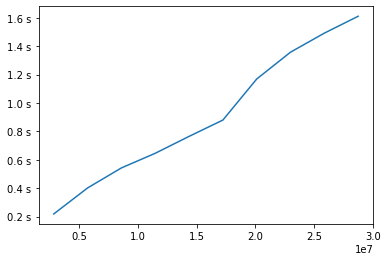

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
x = [i * 2872155 for i in range(1, 11)]
y = [0.219, 0.402,  0.543,  0.646,0.765,  0.880,1.169, 1.358,1.492,1.611]

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
plt.plot(x, y)


In [6]:
# import cv2 as cv
# from skimage.metrics import structural_similarity as ssim
# img_origin_all=np.vstack(img_origin_all)
# img_metal_all=np.vstack(img_metal_all)
# img_unet_all=np.vstack(img_unet_all)
# img_pix2pix_all=np.vstack(img_pix2pix_all)


# print(img_origin_all.shape)
# print(img_metal_all.shape)
# print(img_unet_all.shape)
# print(img_pix2pix_all.shape)

4095

In [13]:
i=30
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_metal_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_metal_'+str(i)+'.png')
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_origin_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_origin_'+str(i)+'.png')
#fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_pred_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
#fig.savefig('img_pred_'+str(i)+'.png')
plt.imshow(img_LI_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()
plt.imshow(img_NMAR_all_array[i,:,:,0].T,vmin=500,vmax=2000,cmap='gray')
plt.show()

NameError: name 'img_metal_all_array' is not defined

In [ ]:
i=0
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_metal_all_array[i,:,:,0]-img_origin_all_array[i,:,:,0],vmin=-500,vmax=1000,cmap='gray')
plt.show()
fig.savefig('img_metal_minus_origin_'+str(i)+'.png')
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(img_pred_all_array[i,:,:,0]-img_origin_all_array[i,:,:,0],vmin=-500,vmax=1000,cmap='gray')
plt.show()
fig.savefig('img_pred_minus_origin_'+str(i)+'.png')

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
y_true=img_origin_all_array[0,:,:,0]
y_pred=img_pred_all_array[0,:,:,0]
mean_squared_error(y_true,y_pred)

In [ ]:
import numpy as np   
y_true=img_origin_all_array[:,:,:,:]
y_pred=img_pred_all_array[:,:,:,:]
y_metal=img_metal_all_array[:,:,:,:]
y_LI=img_LI_all_array[:,:,:,:]
y_NMAR=img_NMAR_all_array[:,:,:,:]
MSE_pred = np.square(np.subtract(y_true,y_pred)).mean()
print(MSE_pred)
MSE_metal = np.square(np.subtract(y_true,y_metal)).mean()
print(MSE_metal)
MSE_LI = np.square(np.subtract(y_true,y_LI)).mean()
print(MSE_LI)
MSE_NMAR = np.square(np.subtract(y_true,y_NMAR)).mean()
print(MSE_NMAR)

In [ ]:
MAE_pred=np.abs(np.subtract(y_true,y_pred)).mean()
print(MAE_pred)
MAE_metal=np.abs(np.subtract(y_true,y_metal)).mean()
print(MAE_metal)
MAE_LI=np.abs(np.subtract(y_true,y_LI)).mean()
print(MAE_LI)
MAE_NMAR=np.abs(np.subtract(y_true,y_NMAR)).mean()
print(MAE_NMAR)

In [ ]:
M=2**16-1

PSNR_pred=10*np.log10(M**2/MSE_pred)
print(PSNR_pred)
PSNR_metal=10*np.log10(M**2/MSE_metal)
print(PSNR_metal)
PSNR_LI=10*np.log10(M**2/MSE_LI)
print(PSNR_LI)
PSNR_NMAR=10*np.log10(M**2/MSE_NMAR)
print(PSNR_NMAR)

In [ ]:
2^16-1

In [ ]:
plt.hist(imgmetal[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imggt[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imgmetal[0,:,:,0]-imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
plt.hist(imggt[0,:,:,0]-imgpred[0,:,:,0], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7);

In [ ]:
a1npy = a1[:,:,:,0]
a2npy = a2[:,:,:,0]
a3npy = a3[:,:,:,0]
a4npy = a4[:,:,:,0]
a5npy = a5[:,:,:,0]

In [ ]:
np.save("a1.npy",a1npy)
np.save("a2.npy",a2npy)
np.save("a3.npy",a3npy)
np.save("a4.npy",a4npy)
np.save("a5.npy",a5npy)

In [ ]:
bb = read_volume('data/outputstestc.tfrecord')
b1 = session.run(bb)
print(b1.shape)
b2 = session.run(bb)
print(b2.shape)
b3 = session.run(bb)
print(b2.shape)
b4 = session.run(bb)
print(b3.shape)
b1npy = b1[:,:,:,0]
b2npy = b2[:,:,:,0]
b3npy = b3[:,:,:,0]
b4npy = b4[:,:,:,0]
np.save("b1.npy",b1npy)
np.save("b2.npy",b2npy)
np.save("b3.npy",b3npy)
np.save("b4.npy",b4npy)

In [ ]:
img1a = img1[0,:,:]

In [ ]:
img1a = img1a.astype(np.uint16)

In [ ]:
img1a

In [ ]:
matplotlib.image.imsave('img1a.png', img1a)

In [ ]:
numpngw.write_png('img1a.png', img1a)

In [ ]:
sum(abs(bb))

In [ ]:
plt.hist(aa, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [ ]:
bb = targets[i,250,:,0] - outputs5[i,250,:,0]

In [ ]:
bb

In [ ]:
plt.hist(bb, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [ ]:
ct_prediction[150,1:5,1:5,0]

In [ ]:
ct_prediction.min()

In [ ]:
import numpy as np
import tensorflow as tf

from mrtoct import data, ioutil

from matplotlib import pyplot as plt

#transform = data.transform.DecodeExample()
pre_transform = data.transform.Compose([
    data.transform.DecodeExample(),
    data.transform.ConstNormalization(tf.uint16.max),
])
post_transform = data.transform.CropOrPad2D(384, 384)
volume = 0
slice = 0

def read_volume(path):
    return (tf.data
            .TFRecordDataset(path, 'GZIP')
            .map(pre_transform)
            .skip(volume).take(1)
            .apply(tf.contrib.data.unbatch())
            #.map(post_transform)
            #.skip(slice)
            .batch(2)
            .make_one_shot_iterator()
            .get_next())

session = tf.Session()

In [ ]:
mr_tensor = read_volume('ctniifile/patient_ct.tfrecord')

In [ ]:
while True:
    try:
        mr = session.run(mr_tensor)
        print(mr.shape)
    except Exception as OutOfRangeError:
        #print(OutOfRangeError.__doc__)
        print(OutOfRangeError.message)
        break

In [ ]:
mr.shape

In [ ]:
plt.imshow(mr[2,:,:,0], cmap='gray')
plt.show()

In [ ]:

inputs_dataset = (tf.data
                  .TFRecordDataset(inputs_path, ioutil.TFRecordCString)
                  .map(pre_transform)
                  .skip(volume).take(1)
                  .apply(tf.contrib.data.unbatch())
                  .map(post_transform)
                  .skip(slice))